In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
california = fetch_california_housing()

In [3]:
X , y = fetch_california_housing(return_X_y=True)

In [4]:
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size =0.2)

In [5]:
w = []
r2 = []
mse =[]
alpha_list = [0, 0.1,0.25, 0.5,1, 2]

for alpha in alpha_list:
    #fit model
    model = Lasso(alpha = alpha)
    model.fit(x_train, y_train)
    
    # prediction
    y_pred = model.predict(x_test)
    
    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    w.append(model.coef_.tolist())
    mse.append(mean_squared_error(y_test,y_pred))
    

C:\Users\vasan\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vasan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vasan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.288e+03, tolerance: 2.187e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

In [6]:
X.shape

(20640, 8)

In [7]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
feature_names = california.feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
print(model.coef_)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.39676642e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


In [10]:
print(w)

[[0.43997358713926094, 0.009194326596731906, -0.11327309810581138, 0.6124907009293556, -6.500965456845528e-06, -0.004013658944750075, -0.4132442565689299, -0.4274692617513248], [0.39122217869335646, 0.014961139208300687, -0.0, 0.0, 1.5234627448069332e-05, -0.003643861651798287, -0.11550878669670078, -0.100576300405954], [0.36147339643227955, 0.015156377413530682, -0.0, -0.0, 2.0957199747954487e-05, -0.002489010468578377, -0.0, -0.0], [0.28891567220194475, 0.011953812315663583, 0.0, -0.0, 9.58456471589639e-06, -7.53636886041134e-07, -0.0, -0.0], [0.14456895858272603, 0.005758954712382305, 0.0, -0.0, -7.717427046277932e-06, -0.0, -0.0, -0.0], [0.0, 0.0, 0.0, -0.0, -2.3967664164321253e-05, -0.0, -0.0, -0.0]]


In [11]:
print(r2)

[0.5969246009553055, 0.5362009520771627, 0.49057189186877903, 0.44905056075099903, 0.28112517903151724, -0.0005867890393078667]


In [12]:
print(mse)

[0.5479146862917381, 0.6304584959720407, 0.6924836958952223, 0.7489251139716729, 0.9771920413587446, 1.3601331113818222]


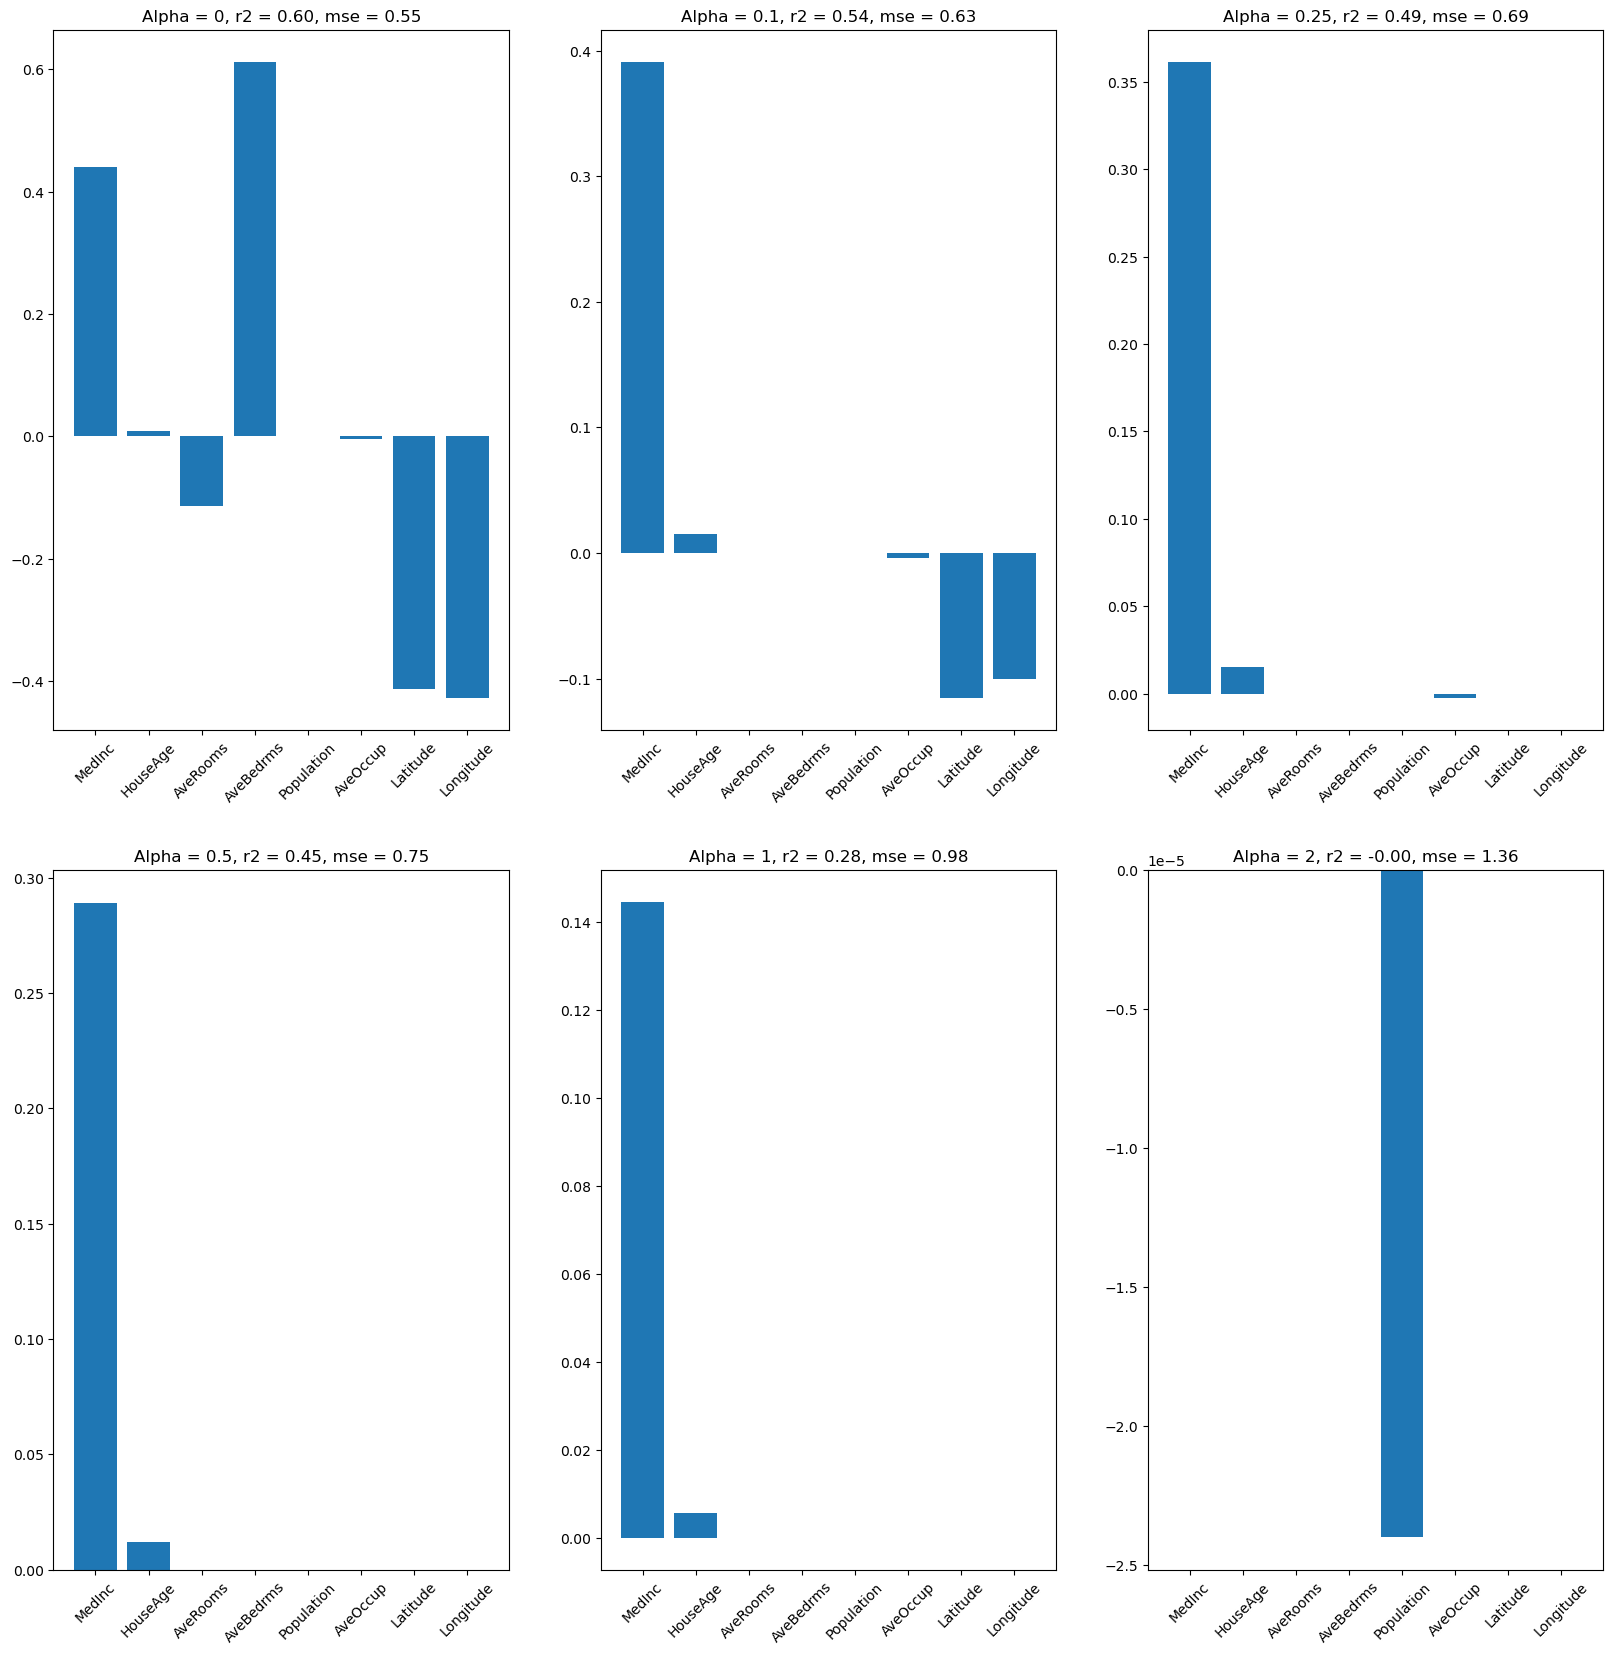

In [13]:
# visualizing feature selection
plt.figure(figsize=(20, 20))
for i in range(len(alpha_list)):
    plt.subplot(2, 3, i+1)
    plt.bar(feature_names,w[i])
    plt.xticks(rotation=45)
    plt.title(f"Alpha = {alpha_list[i]}, r2 = {r2[i]:.2f}, mse = {mse[i]:.2f}")
plt.show()

### from the above graph, median income seems to be the most important feature, followed by house age and then by the geographical place of the house. We can also notice that the r2 scores starts dropping after removing more than 5  features

## Let us try with Ridge

In [14]:
w = []
r2 = []
mse =[]
alpha_list = [0, 0.1,0.25, 0.5,1, 2]

for alpha in alpha_list:
    #fit model
    model = Ridge(alpha = alpha)
    model.fit(x_train, y_train)
    
    # prediction
    y_pred = model.predict(x_test)
    
    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    w.append(model.coef_.tolist())
    mse.append(mean_squared_error(y_test,y_pred))

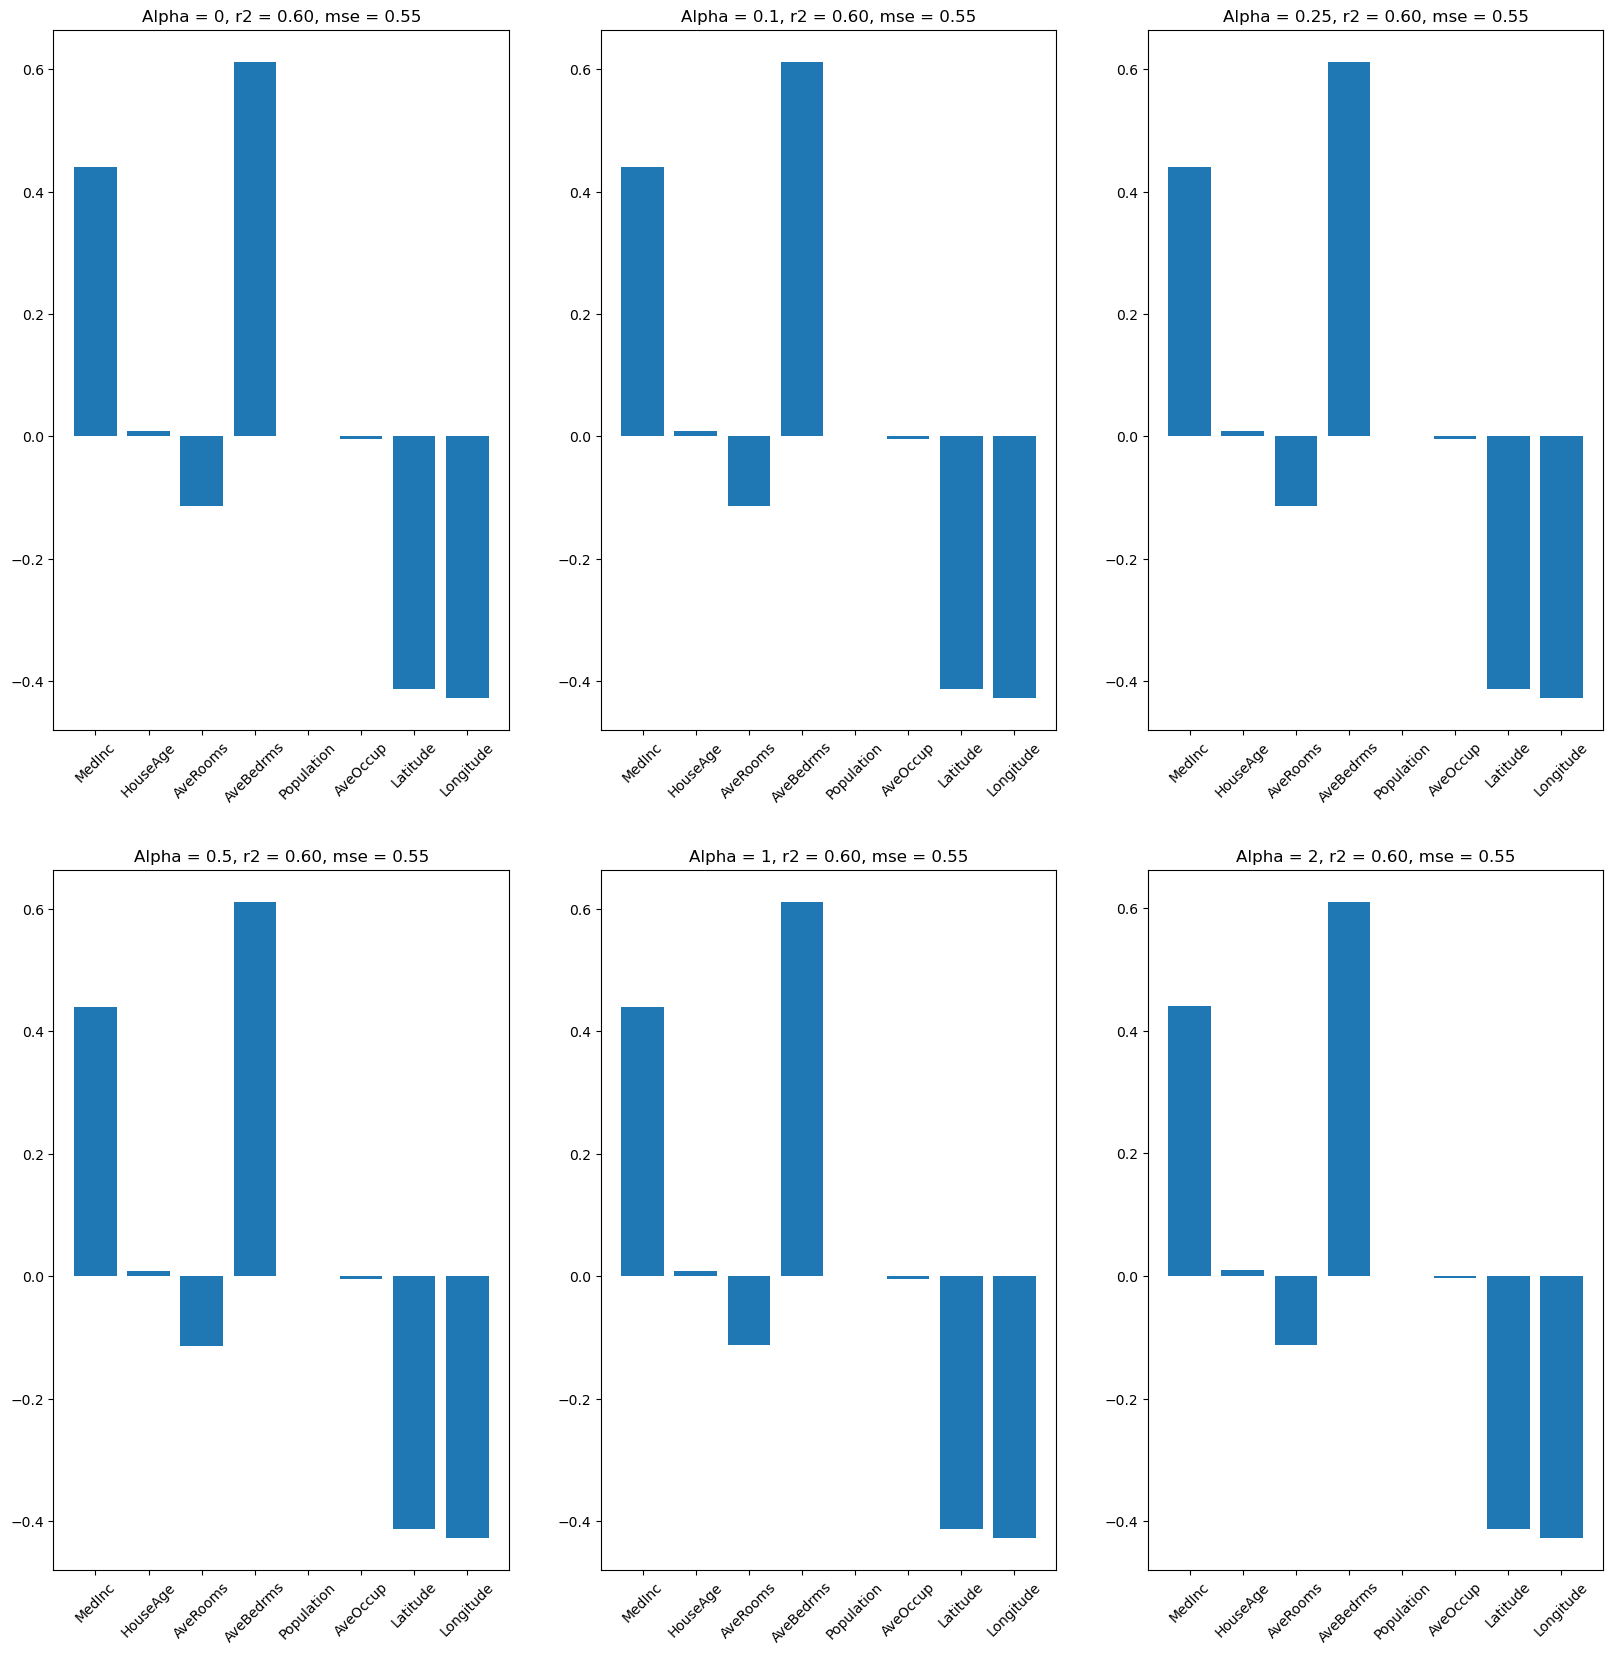

In [15]:
# visualizing feature selection
plt.figure(figsize=(20, 20))
for i in range(len(alpha_list)):
    plt.subplot(2, 3, i+1)
    plt.bar(feature_names,w[i])
    plt.xticks(rotation=45)
    plt.title(f"Alpha = {alpha_list[i]}, r2 = {r2[i]:.2f}, mse = {mse[i]:.2f}")
plt.show()

### as we can see , Ridge regularization does not impact feature selection

## Let us now compare the r2 scores of the same dataset with SVM Regressor, KNN-Regressor, Lasso Regressor

### SVM Regressor

In [16]:
svm_reg = svm.SVR()
svm_reg.fit(x_train,y_train)
y_pred = svm_reg.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2 , mse)

-0.03818791456313941 1.4112456549516716


In [17]:
svr_rbf = svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)


In [18]:
svr_rbf.fit(x_train,y_train)
y_pred = svr_rbf.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2 , mse)

0.15654238812433996 1.1465418477697438


### KNN Regressor

In [19]:


model = KNeighborsRegressor(n_neighbors= 20)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2 , mse)


0.130812758031009 1.1815170465400036


## Comparison of R2 scores for the california housing dataset

| model | R2 score |No of features|
|-------|--------|------|
|Ridge Regressor| 0.60|8|
| Lasso Regressor | 0.55 |5|
| SVM Regressor | 0.16|8|
| KNN Regressor | 0.14|8|